In [1]:
#Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

#Data Description:
#The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers
#ID --Unique ID
#Balance--Number of miles eligible for award travel
#Qual_mile--Number of miles counted as qualifying for Topflight status

#cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
#cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
#cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000

#Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

#Bonus_trans--Number of non-flight bonus transactions in the past 12 months

#Flight_miles_12mo--Number of flight miles in the past 12 months

#Flight_trans_12--Number of flight transactions in the past 12 months

#Days_since_enrolled--Number of days since enrolled in flier program

#Award--whether that person had award flight (free flight) or not


 

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [93]:
datae = pd.read_excel("E://Excelr//Assignments//Assignments DS//Clustering//EastWestAirlines.xlsx", 1)
datae.head(4)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0


In [94]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [95]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(datae.iloc[:,1:])
df_norm.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [96]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [97]:
type(df_norm)

pandas.core.frame.DataFrame

In [98]:
z = linkage(df_norm, method="complete",metric="euclidean")

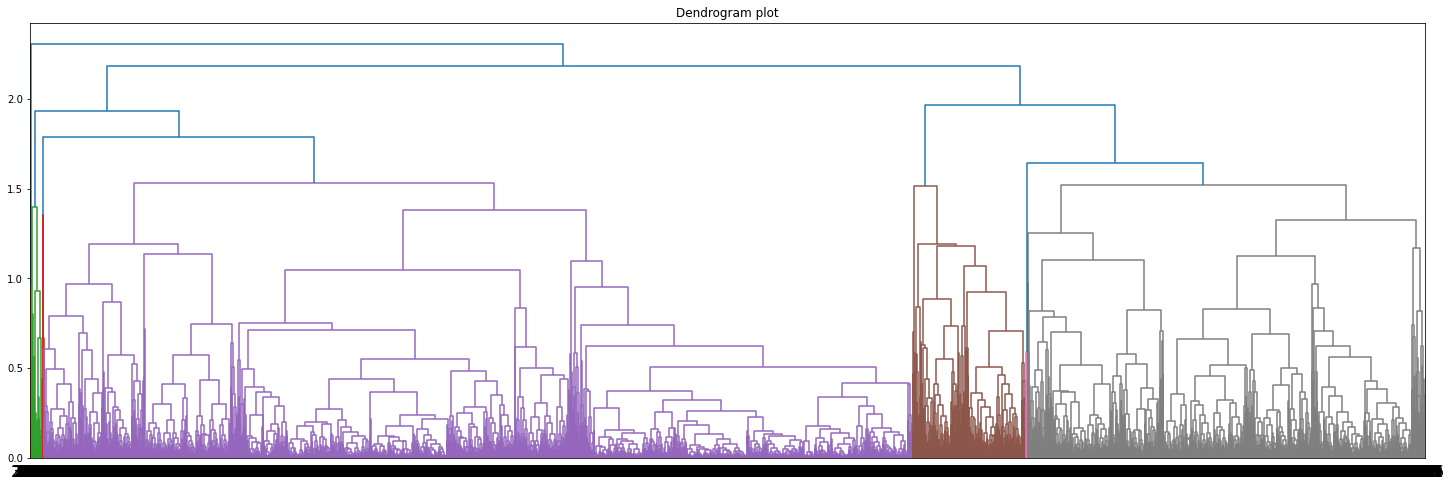

In [99]:
plt.figure(figsize=(25,8));plt.title('Dendrogram plot');
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() #seeing the dendogram we can figure out that there are 4 clusters formed from the plot.

In [100]:
#There are 4 number of clusters formed from the graph now we group them into cluster using agglomerative clustering.
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering 
h = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_norm) 

h.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [101]:
cluster_labels=pd.Series(h.labels_) #series format

In [102]:
datae['milclusters']=cluster_labels # creating a  new column and assigning the new column to the dataset.
datae = datae.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
datae.head()

,milclusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [103]:
# getting aggregate mean of each cluster
datae.groupby(datae.milclusters).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
milclusters,,,,,,,,,,,,
0,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


In [104]:
#KMeans Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [105]:
k=list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [106]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

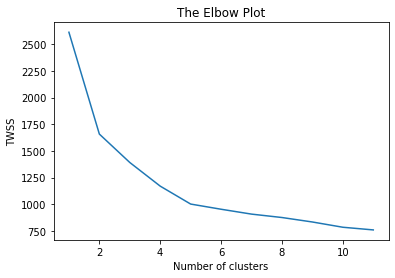

In [107]:
#SCREE PLOT
plt.plot(range(1,12),TWSS)
plt.title("The Elbow Plot")
plt.xlabel("Number of clusters")
plt.ylabel("TWSS")
plt.show()

In [108]:
final_model=KMeans(n_clusters=5) #as there is an elbow formation at the 5 cluster we choose n_cluster as 5.
final_model.fit(df_norm)

KMeans(n_clusters=5)

In [109]:
model.labels_ # getting the labels of clusters assigned to each row 
a=pd.Series(model.labels_)  # converting numpy array into pandas series object 
datae['clust1']=a
datae.head(7)

,milclusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust1
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
5,0,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,0,7,84914,0,3,1,1,27482,25,0,0,6994,0,2


In [113]:
datae = datae.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,0,13]]
datae.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,milclusters,clust1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2,4


In [114]:
datae.iloc[:,0:14].groupby(datae.clust1).mean() #grouping and calculating the mean of the dataset.

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,milclusters,clust1
clust1,,,,,,,,,,,,,,
0,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,0.000000,0
1,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1.979198,1
2,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,0.000000,2
3,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,0.000000,3
4,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1.600248,4
